In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [2]:
distances = {}
class Location:
    def __init__(self, x, y, name):
        self.coords = np.array([x, y])
        self.name = name
    
    def distance(self, location):
        key = frozenset([self, location])
        if key not in distances:
            distances[key] = np.linalg.norm(self.coords - location.coords)
        return distances[key]
    
    def __repr__(self):
        return self.name

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = np.array(route)
        self.distance = 0
        self.fitness= 0.0
    
    def total_route_distance(self):
        if self.distance == 0:
            pathDistances = [self.route[i].distance(self.route[(i + 1) % len(self.route)]) for i in range(len(self.route))]
            self.distance = np.sum(pathDistances)
        return self.distance
    
    def route_fitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.total_route_distance())
        return self.fitness

In [4]:
def new_route(locationList):
    route = random.sample(locationList, len(locationList))
    return route

In [5]:
def init_population(popSize, locationList):
    return [random.sample(locationList, len(locationList)) for _ in range(popSize)]

In [6]:
def sort_routes(population):
    fitnessResults = np.array([Fitness(individual).route_fitness() for individual in population])
    return np.argsort(-fitnessResults)  
# Ordena en orden descendente y devuelve los índices

In [7]:
def selection(popRanked, eliteSize, population):
    selectionResults = popRanked[:eliteSize].tolist()
    fitnessResults = np.array([Fitness(population[i]).route_fitness() for i in popRanked])
    probSelection = fitnessResults / fitnessResults.sum()
    selectedIndices = np.random.choice(popRanked, size=len(popRanked) - eliteSize, p=probSelection)
    selectionResults.extend(selectedIndices.tolist())
    return selectionResults

In [8]:
def mating_pool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [10]:
def breed_population(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            location1 = individual[swapped]
            location2 = individual[swapWith]
            
            individual[swapped] = location2
            individual[swapWith] = location1
    return individual

In [12]:
def mutate_population(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def next_gen(currentGen, eliteSize, mutationRate):
    popRanked = sort_routes(currentGen)
    # Aquí se pasa currentGen como population
    selectionResults = selection(popRanked, eliteSize, currentGen)  
    matingpool = mating_pool(currentGen, selectionResults)
    children = breed_population(matingpool, eliteSize)
    next_gen = mutate_population(children, mutationRate)
    return next_gen

In [14]:
def genetic_algorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = init_population(popSize, population)
    popRanked = sort_routes(pop)
    # El índice del mejor individuo
    bestFitnessIndex = popRanked[0]  
    optimalRoute = pop[bestFitnessIndex]
    print("Distancia Inicial: " + str(1 / Fitness(optimalRoute).route_fitness()))

    for i in range(0, generations):
        pop = next_gen(pop, eliteSize, mutationRate)
    
    popRanked = sort_routes(pop)
    bestFitnessIndex = popRanked[0]
    optimalRoute = pop[bestFitnessIndex]
    print("Distancia Final: " + str(1 / Fitness(optimalRoute).route_fitness()))
    return optimalRoute


In [15]:
locations = [
    Location(x=25, y=60, name="Plaza Patio"),
    Location(x=42, y=63, name="Galerias"),
    Location(x=40, y=90, name="Ciudad Deportiva"),
    Location(x=70, y=90, name="Dominos Pizza"),
    Location(x=35, y=80, name="Al Super"), 
    Location(x=50, y=80, name="Campo Redondo"),
    Location(x=100, y=80, name="Al Super"),
    Location(x=70, y=70, name="Facultad Sistemas"),
    Location(x=40, y=120, name="Sams"),
    Location(x=50, y=60, name="ITS"),
    Location(x=90, y=100, name="Odontologia"),
    Location(x=90, y=58, name="Facultad Artes"),
    Location(x=120, y=80, name="Starbucks"),
    Location(x=108, y=90, name="Carls Jr"),
    Location(x=20, y=40, name="Gasolinera"),
    Location(x=126, y=74, name="Muguerza"),
    Location(x=130, y=90, name="Costco"),
    Location(x=150, y=180, name="John Deere")
]

In [16]:
def genetic_algorithm_plot(population, popSize, eliteSize, mutationRate, generations):
    pop = init_population(popSize, population)
    progress = []
    
    for i in range(generations + 1):  # Incluir la generación inicial
        if i > 0:  # Evita calcular la próxima generación en la iteración inicial
            pop = next_gen(pop, eliteSize, mutationRate)
        
        bestIndex = sort_routes(pop)[0]
        bestFitness = Fitness(pop[bestIndex]).route_fitness()
        progress.append(1 / bestFitness)
    
    plt.figure(figsize=(10, 6)) 
    plt.plot(progress, color='darkturquoise', linewidth=2, marker='o', markersize=6, markerfacecolor='red', markevery=[0, len(progress)-1])
    plt.title('Cambio de distancia por generación')
    plt.xlabel('Generación')
    plt.ylabel('Distancia') 
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()  
    plt.show()



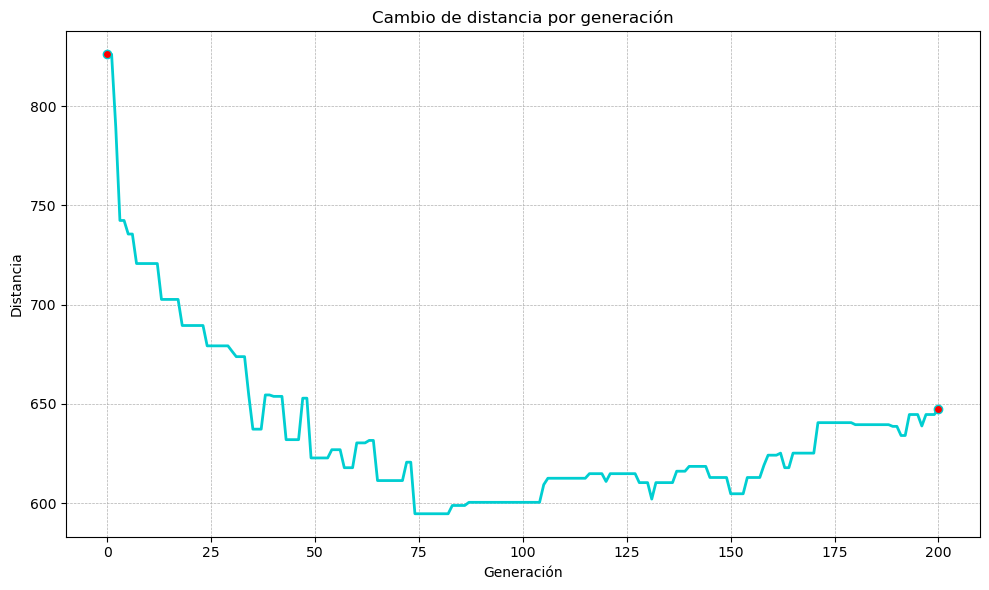

In [17]:
genetic_algorithm_plot(population=locations, popSize=50, eliteSize=35, mutationRate=0.01, generations=200)

In [18]:
def calc_distance(route):
    total_distance = 0
    for i in range(len(route)):
        fromLocation = route[i]
        toLocation = route[(i + 1) % len(route)]  # Asegura el retorno a la ciudad de origen
        total_distance += fromLocation.distance(toLocation)
    return total_distance

In [19]:
def calc_fuel_usage(total_distance, fuel_efficiency):
    return total_distance / fuel_efficiency

In [20]:
def calc_time(route, average_speed):
    total_distance = calc_distance(route)
    distance_time = total_distance / average_speed  # Tiempo = Distancia / Velocidad
    return distance_time

In [21]:
# Asumiendo una eficiencia de combustible en km/L para el vehículo
fuel_efficiency = 15
# Asumiendo una velocidad promedio en km/h
average_speed = 90 

In [22]:
optimalRoute = genetic_algorithm(population=locations, popSize=50, eliteSize=35, mutationRate=0.01, generations=200)

Distancia Inicial: 863.4665225630141
Distancia Final: 591.0802418938476


In [23]:
# Creación de comparaciones
## Calcular tiempo de trayectoria
travelTime = calc_time(optimalRoute, average_speed)

## Calcular la distancia y combustible total para el Problema A
totalDistance = calc_distance(optimalRoute)
fuelUsage = calc_fuel_usage(travelTime, fuel_efficiency)

In [24]:
def plot_route(locationList, optimalRoute, title="Mejor Ruta"):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Dibujar los puntos específicos
    for location in locationList:
        ax.plot(location.coords[0], location.coords[1], 'o', markersize=8, color='black')
        ax.text(location.coords[0] + 1.5, location.coords[1], location.name, color='dodgerblue', fontsize=10)

    # Dibujar la ruta óptima
    for i in range(-1, len(optimalRoute) - 1):
        start_location = optimalRoute[i]
        end_location = optimalRoute[i + 1]
        ax.plot([start_location.coords[0], end_location.coords[0]], [start_location.coords[1], end_location.coords[1]], 
                linestyle='-', color='black', linewidth=2, marker='o', markerfacecolor='cyan', markersize=6)
    
    # Resaltar el punto de inicio y fin
    ax.plot(optimalRoute[0].coords[0], optimalRoute[0].coords[1], 'o', markersize=12, markerfacecolor='lime', label='Inicio')
    ax.plot(optimalRoute[-1].coords[0], optimalRoute[-1].coords[1], 'o', markersize=12, markerfacecolor='red', label='Fin')

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.legend()

    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_facecolor('#ffff')
    ax.set_frame_on(True)

    plt.tight_layout()
    plt.show()



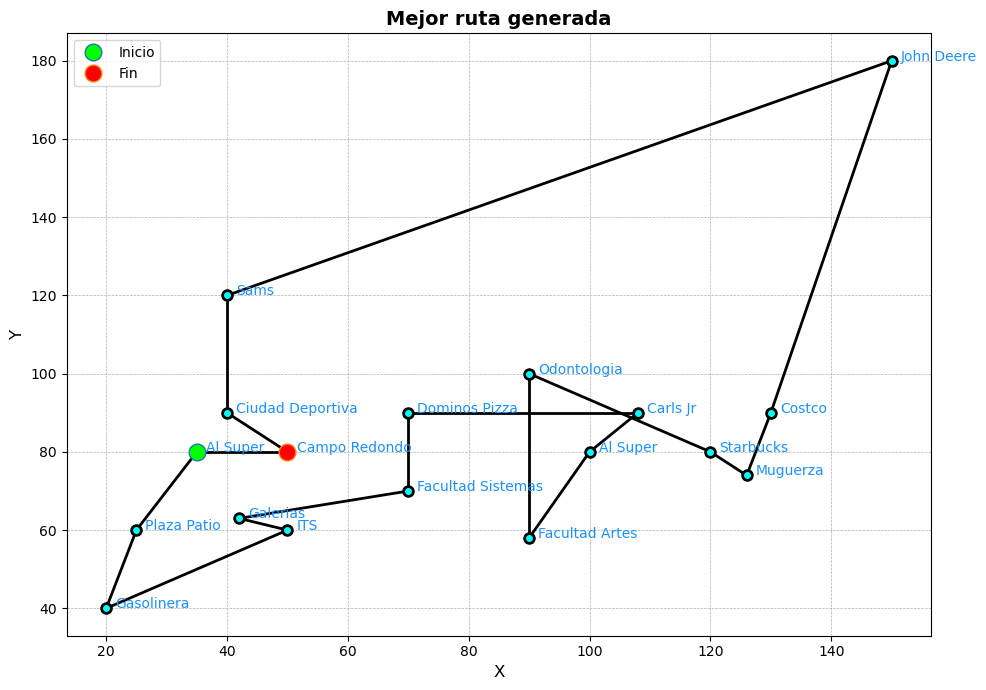

In [25]:
# Graficar la mejor ruta para el problema
plot_route(locations, optimalRoute, "Mejor ruta generada")

In [26]:
print("Orden de ruta")
print(optimalRoute)

Orden de ruta
[Al Super, Plaza Patio, Gasolinera, ITS, Galerias, Facultad Sistemas, Dominos Pizza, Carls Jr, Al Super, Facultad Artes, Odontologia, Starbucks, Muguerza, Costco, John Deere, Sams, Ciudad Deportiva, Campo Redondo]


In [27]:
#Muestra de comparaciones

##Resultados Ruta:
print("Resultados de ruta:")
print("Tiempo de Trayectoria: {:.2f} horas".format(travelTime))
print("Distancia Total para el problema: {:.2f} km".format(totalDistance))
print("Uso Estimado de Combustible para el problema: {:.2f} L".format(fuelUsage))


Resultados de ruta:
Tiempo de Trayectoria: 6.57 horas
Distancia Total para el problema: 591.08 km
Uso Estimado de Combustible para el problema: 0.44 L
